# ADMN 5006 - Analytics for Financial Markets
# Assignment # 1

<p>Your assignment is to design and develop machine learning models for corporate bankruptcy prediction 2 years into the future using the data provided. </p>
   - The column “BK” in the data provided denotes whether the company goes bankrupt (indicated by 1) 2 years in the future, or not (indicated by 0). 
   - Some of the input variables included are “Assets Growth”, “Sales Growth”, “Earnings-per-share (EPS)”, “Return-on-equity (ROE)”, etc. 
   - In addition, the paper entitled: “Machine learning models and bankruptcy prediction” by Barboza et. al. is posted to the portal and is an excellent reference for you to use.  
    
<p>Note however that the dataset you are given is not the same as the one used in the aforementioned paper.  Therefore, don’t be alarmed if your results don’t agree with the Barboza et. al. paper.  You will need to partition your data into testing and training sets and explain your experimental set-up.</p>

<p>The input and output variables are described below:</p>
<table>
    <tr>
        <td>EPS</td>
        <td>Earnings Per Share</td>
    </tr>
    <tr>
        <td> Liquidity </td>
        <td> Working Capital/Total Assets</td>
    </tr>
    <tr>
        <td>Profitability</td>
        <td>Retained Earnings/Total Assets</td>
    </tr>
    <tr>
        <td>Productivity</td>
        <td>EBIT/Total Assets</td>
    </tr>
    <tr>
        <td>Leverage Ratio </td>
        <td>(Total Long-term debt + Debt in Current liabilities)/Stockholders Equity</td>
    </tr>
    <tr>
        <td>Asset Turnover</td>
        <td>Sales/ Total Assets</td>
    </tr>
    <tr>
        <td>Operational Margin</td>
        <td> EBIT/Sales</td>
    </tr>
    <tr>
        <td>Market Book Ratio</td>
        <td>(Price Close Annual Fiscal * Common Shares Outstanding)/Book Value Per Share</td>
    </tr>
    <tr>
        <td>Asset Growth</td>
        <td>Change in assets from previous year</td>
    </tr>
    <tr>
        <td>Sales Growth</td>
        <td>Change in sales from previous year</td>
    </tr>
    <tr>
        <td>Employee Growth</td>
        <td>Change in employees from previous year</td>
    </tr>
    <tr>
        <td>Tobin’s Q</td>
        <td>(Total market value of company + liabilities)/ (Total asset or book value + liabilities)</td>
    </tr>
    <tr>
        <td>BK</td>
        <td>Company bankrupt or not</td>
    </tr>
</table>

## Our Goals
   - Understand the data that was provided to us.
   - Create a 50/50 sub-dataframe ratio of "Bankrupt" and "Not Bankrupt" (SMOTE Library)
   - Determine the Classifiers we are going to use and decide which one has the higher accuracy and AUC
   - Understand common mistakes made with imbalanced datasets.

## Outline:
1. Initialization
2. Gather Sense of our Data
3. Level 1 Preprocessing
4. Correcting Missing Values *Imbalanced
5. Testing
6. Level 2 Preprocessing
7. Correcting Imbalanced Dataset
8. Correcting Outliers
9. Level 2: Testing
10. Conclusion


## Initialization
- Authors: Luke, Jad, Rita, Sreehari, Arnab, Varun
- Data: Bankruptcy_data_Final.xlsx
- Computing resources: Machine Learning (Random Forest, SVC, Naive Bayes)
- Software: Jupyter Notebook

## Import Libraries Required
The libraries listed are going to help us solving the dataset

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats
import seaborn as sns
import missingno as msno
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

#for pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer #for missing data values
from imblearn.over_sampling import SMOTE #to normally distribute the data

#computing resources
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB

#hyperparmeter tuning
from sklearn.datasets import make_classification
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

#testings
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,log_loss,roc_auc_score, precision_score, recall_score

## Import Data Source
In this part we have to import the data source to the notebook and see the basic statistics of the report.

- The data will be loaded using the pandas library which will make the excel file into a dataframe in python

In [2]:
#Data source: 
#Source Query location: 
path =  'Bankruptcy_data_Final.xlsx'
# reads the data from the file - denotes as CSV, it has no header, sets column headers
#df =  pd.read_csv(path, sep=',')
df = pd.read_excel(path)

## Describe Data
Now we apply the basic statistics of the dataset we got.
- Column Names
- Number of Rows and Columns
- Data types
- Descriptive Statistics
- Information
- Sample Dataset

In [3]:
df.columns

Index(['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio',
       'Asset Turnover', 'Operational Margin', 'Return on Equity',
       'Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth',
       'BK'],
      dtype='object')

In [4]:
df.shape

(92872, 13)

In [5]:
df.dtypes

EPS                   float64
Liquidity             float64
Profitability         float64
Productivity          float64
Leverage Ratio        float64
Asset Turnover        float64
Operational Margin    float64
Return on Equity      float64
Market Book Ratio     float64
Assets Growth         float64
Sales Growth          float64
Employee Growth       float64
BK                      int64
dtype: object

In [6]:
df.describe()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92867.000000,92625.000000,92625.000000,92625.000000,92846.000000,92625.000000,87315.000000,92864.000000,9.281500e+04,86171.000000,86171.000000,85862.000000,92872.000000
mean,-14.461355,-2.631237,-29.537274,-1.222870,1.345316,1.053613,-7.915485,-2.112382,3.585063e+02,1.294075,1.900108,0.343322,0.006008
std,2195.467288,121.610921,677.230667,35.885556,253.038093,2.115945,214.460079,352.596902,2.606364e+04,73.769522,177.632638,14.074156,0.077280
min,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431034,-1.000000,0.000000
25%,-0.140000,0.020000,-0.640000,-0.060000,0.000000,0.390000,-0.030000,-0.080000,1.120000e+01,-0.052596,-0.033522,-0.048107,0.000000
50%,0.330000,0.190000,0.070000,0.060000,0.280000,0.830000,0.060000,0.030000,5.828000e+01,0.051844,0.059733,0.017241,0.000000
75%,1.530000,0.400000,0.310000,0.110000,0.820000,1.390000,0.140000,0.070000,2.401400e+02,0.192062,0.204231,0.130944,0.000000
max,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


In [8]:
df.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


## Data summary
 - Columns: 
        'EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio',
       'Asset Turnover', 'Operational Margin', 'Return on Equity',
       'Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth',
       'BK'
 - Shape:
     (92872, 13)
 
 <p> Looking at the data there are 92872 rows and 13 columns in total </p>
       

## Check Data Validity
<p> To check our data validity; we need to check if there are missing values in the table, check of uniqueness, check for normality, and also check for extreme outliers in the dataset that could distort the algorithm </p>

Text(0.5, 1.0, 'Distribution of Missing values')

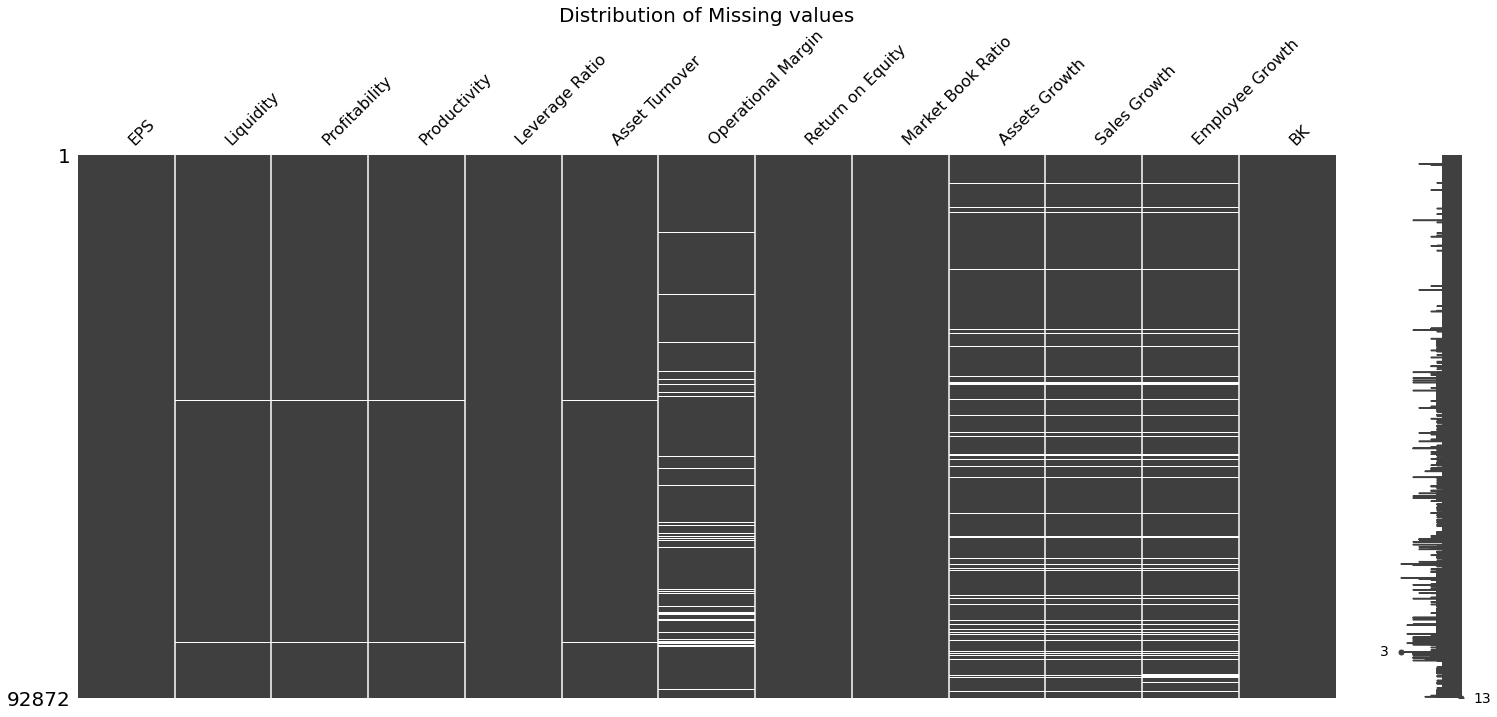

In [9]:
msno.matrix(df)
plt.title('Distribution of Missing values',fontsize = 20)

As much as we want to delete the data from the assets growth, sales growth, employee growth it does not satistfy the condition of deleting the column if it is not greater than 50% of null values

In [10]:
#Lets start with missing values
def missing_values_table(df):
    #Code Description: Attempt to show the missing values in the table
    #Input: Dataframe
    #Output: missing value table rendered columns
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [11]:
missing_values_table(df)

Your selected dataframe has 13 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
Employee Growth,7010,7.5
Assets Growth,6701,7.2
Sales Growth,6701,7.2
Operational Margin,5557,6.0
Liquidity,247,0.3
Profitability,247,0.3
Productivity,247,0.3
Asset Turnover,247,0.3
Market Book Ratio,57,0.1
Leverage Ratio,26,0.0


If the columns have more than 50% missing data then we will drop the column but looking at the percentages we don't need to drop any of the columns

In [12]:
#Let's check for unique values in the columns
df.nunique()

EPS                    6987
Liquidity              6108
Profitability          9363
Productivity           6075
Leverage Ratio         6936
Asset Turnover         5051
Operational Margin     7485
Return on Equity       5750
Market Book Ratio     50336
Assets Growth         85604
Sales Growth          80350
Employee Growth       49532
BK                        2
dtype: int64

Looking at the dataset all the columns have more than 2 distinction. No need to drop any columns here

In [13]:
#Now lets delete rows which has more than 60% missing data
limit_per = int(len(df.columns) * .6)
df = df.dropna(thresh = limit_per)

In [14]:
df.shape

(92808, 13)

From 92872 rows, we have deleted 64 rows that has more than 7 columns that has no value in it.

### Correlation between the dataframe

In [15]:
df.corr()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
EPS,1.000000,-0.000129,-0.000282,-0.000212,0.000025,0.000971,-0.000226,0.248225,0.000114,0.000079,0.000073,0.000179,-0.007229
Liquidity,-0.000129,1.000000,0.470622,0.226976,0.000147,-0.035377,0.004070,0.582335,0.001464,0.000499,0.000256,0.000829,0.001193
Profitability,-0.000282,0.470622,1.000000,0.434535,0.000280,-0.039318,0.019111,0.106389,-0.003982,0.000877,0.000469,0.001376,0.002454
Productivity,-0.000212,0.226976,0.434535,1.000000,0.000225,-0.021524,0.085273,0.001009,0.006186,0.000495,0.000300,0.001074,0.001346
Leverage Ratio,0.000025,0.000147,0.000280,0.000225,1.000000,-0.001203,0.000293,-0.000012,0.030273,-0.000093,0.000098,-0.000062,-0.000148
Asset Turnover,0.000971,-0.035377,-0.039318,-0.021524,-0.001203,1.000000,0.018420,-0.005039,-0.006375,-0.004082,-0.000050,-0.003182,0.015191
Operational Margin,-0.000226,0.004070,0.019111,0.085273,0.000293,0.018420,1.000000,0.002026,0.007163,-0.001166,0.000397,0.000092,0.001755
Return on Equity,0.248225,0.582335,0.106389,0.001009,-0.000012,-0.005039,0.002026,1.000000,0.000088,0.000111,0.000061,0.000155,-0.006530
Market Book Ratio,0.000114,0.001464,-0.003982,0.006186,0.030273,-0.006375,0.007163,0.000088,1.000000,-0.000682,-0.000928,0.000175,-0.000968
Assets Growth,0.000079,0.000499,0.000877,0.000495,-0.000093,-0.004082,-0.001166,0.000111,-0.000682,1.000000,0.073809,0.012893,-0.001394


<AxesSubplot:>

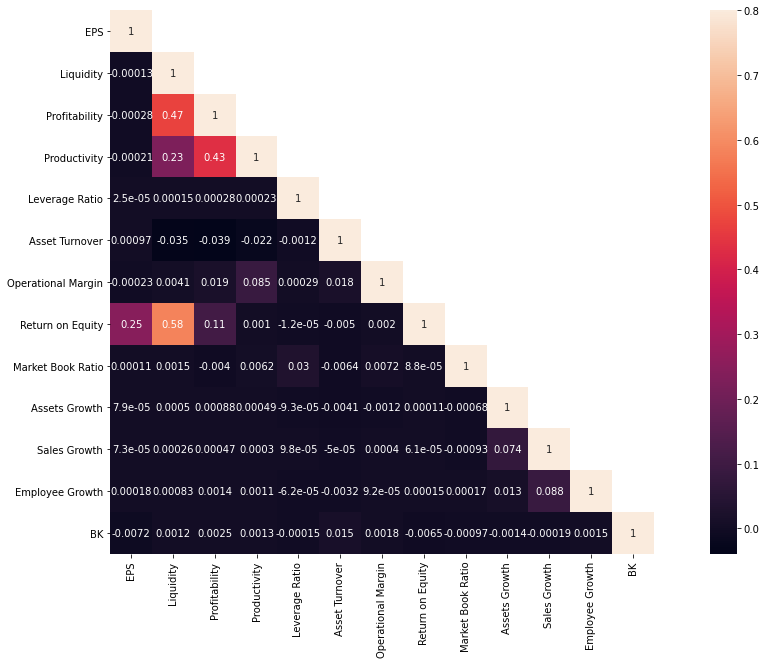

In [16]:
mask = np.array(df.corr())
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots() 
fig.set_size_inches(20,10)
sns.heatmap(df.corr(), mask = mask, vmax =.8, square = True, annot = True)

In [17]:
# The classes are heavily skewed we need to solve this issue later.
print('Not Bankrupt', round(df['BK'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Bankrupt', round(df['BK'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Not Bankrupt 99.4 % of the dataset
Bankrupt 0.6 % of the dataset


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions (0: Not Bankrupt || 1: Bankrupt)')

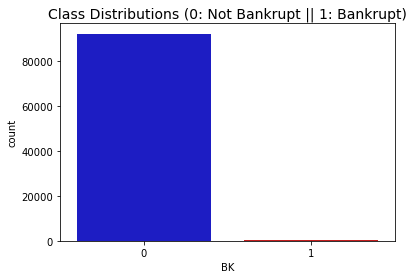

In [18]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('BK', data=df, palette=colors)
plt.title('Class Distributions (0: Not Bankrupt || 1: Bankrupt)', fontsize=14)

**Distributions**: By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

In [19]:
df['BK'].value_counts()[1] 

558

## Adding data to missing values
Let's now try adding data to the missing values using the KNNImputer with n_neighbors = 5 
so we can check how effective is our model

In [20]:
imputer = KNNImputer(n_neighbors=5,weights='uniform')
df_no_na = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
print("Missing Data Added")

Missing Data Added


In [21]:
df_no_na.isnull().sum()

EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64

In [22]:
df.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [23]:
df_no_na.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,0.111757,-0.002385,0.057881,0.0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0.0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0.0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0.0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0.0


No more missing Data in our dataset

## Let's try applying some classification to our data

In [24]:
#let's divide our X coefficients to our Y 
#split df into X and Y
y = df_no_na['BK']
X = df_no_na.drop('BK',axis =1)

In [25]:
# change coefficient Y to 1 or 0
y = pd.to_numeric(y, downcast="integer")
y

0        0
1        0
2        0
3        0
4        0
        ..
92803    0
92804    0
92805    0
92806    0
92807    1
Name: BK, Length: 92808, dtype: int8

In [26]:
y

0        0
1        0
2        0
3        0
4        0
        ..
92803    0
92804    0
92805    0
92806    0
92807    1
Name: BK, Length: 92808, dtype: int8

In [27]:
X

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
0,1.580000,0.360000,0.180000,0.130000,1.330000,1.770000,0.070000,0.150000,2.220000,0.111757,-0.002385,0.057881
1,1.410000,0.360000,0.190000,0.120000,1.310000,1.590000,0.070000,0.130000,2.410000,0.126319,0.014278,0.040179
2,0.310000,0.320000,0.130000,0.080000,1.030000,1.550000,0.050000,0.040000,2.560000,0.368077,0.327909,0.566524
3,0.710000,0.280000,0.140000,0.080000,0.800000,1.390000,0.060000,0.050000,5.280000,-0.020809,-0.118904,-0.095890
4,0.750000,0.410000,0.130000,0.080000,0.200000,1.300000,0.060000,0.040000,8.680000,0.233089,0.146807,0.053030
...,...,...,...,...,...,...,...,...,...,...,...,...
92803,-1.488171,-0.015494,-0.758859,-0.056905,-1042.104918,0.174115,-0.326823,-6.614095,-1.846719,-0.073287,-0.557483,-0.076923
92804,-1.807630,0.093838,-1.204734,-0.121122,-4.530214,0.215844,-0.561155,-4.519074,-2.474549,-0.201835,-0.010544,-0.208333
92805,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.569448,3274.505633,-0.168001,-0.020206,-0.105263
92806,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824


In [28]:
def preprocess_inputs(X,y):
    #train test split
    X_train,X_test,y_train,y_test= train_test_split(X, y, train_size = 0.3, shuffle = True, random_state = 1)
    
    # Scale X | StandardScaler for now just to check things out :3
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train),index=X_train.index, columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test),index=X_test.index, columns = X_test.columns)
    return X_train, X_test, y_train, y_test

In [29]:
X_train, X_test, y_train, y_test = preprocess_inputs(X,y)

### Let's check our training variables

In [30]:
X_train

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
20403,0.010328,0.019799,0.043202,0.044316,-0.005428,-0.286706,0.057771,0.009156,-0.000538,-0.028989,-0.011007,-0.002829
22657,0.009135,0.020676,0.043398,0.046029,-0.007245,0.087135,0.057281,0.009228,0.005844,-0.030913,-0.011527,-0.032218
15384,0.008552,0.023308,0.044020,0.050025,-0.007814,0.113304,0.057880,0.009085,-0.021741,-0.027580,-0.011121,-0.028973
50871,0.007946,0.020883,0.043236,0.044316,-0.006829,-0.069878,0.057172,0.009049,-0.022168,-0.030038,-0.010990,-0.021759
47785,0.008288,0.020367,0.043167,0.047741,-0.002341,-0.167077,0.058316,0.009049,0.318751,-0.031474,-0.011113,-0.093345
...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0.007479,0.021296,0.043271,0.041176,-0.006939,-0.021279,0.056518,0.008924,-0.011368,-0.033306,-0.011320,-0.021647
73349,0.007595,-1.212465,-1.327200,-3.563921,-0.008449,-0.380167,-14.532822,0.007886,-0.035514,-0.044306,-0.011468,0.104120
50057,0.007622,0.023669,0.039674,0.040319,-0.007814,-0.077355,0.056300,0.008888,-0.022698,-0.036667,-0.011024,-0.037468
5192,0.004898,0.022741,0.042821,0.044316,0.389433,0.259102,0.057009,0.006812,-0.017488,-0.046010,-0.012091,-0.066211


In [31]:
X_train.describe()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
count,2.784200e+04,2.784200e+04,2.784200e+04,2.784200e+04,2.784200e+04,2.784200e+04,2.784200e+04,2.784200e+04,2.784200e+04,2.784200e+04,2.784200e+04,2.784200e+04
mean,-2.207847e-17,-1.902464e-17,-1.091377e-17,2.839907e-18,2.984419e-16,2.180118e-17,-5.592758e-16,6.988795e-17,1.465761e-17,2.297596e-18,-5.531588e-18,3.604227e-17
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-1.488558e+02,-1.339892e+02,-9.182908e+01,-7.531902e+01,-7.082681e+00,-4.250275e-01,-7.100971e+01,-1.590601e+02,-5.915901e+01,-7.334086e-02,-1.217579e-01,-1.177014e-01
25%,7.630970e-03,2.016039e-02,4.215806e-02,4.117581e-02,-7.814267e-03,-2.530604e-01,5.635491e-02,8.834308e-03,-2.339493e-02,-3.537839e-02,-1.160301e-02,-3.319816e-02
50%,7.844273e-03,2.098606e-02,4.301722e-02,4.460135e-02,-7.179338e-03,-9.230856e-02,5.717190e-02,9.031186e-03,-1.991074e-02,-3.093328e-02,-1.122863e-02,-2.732988e-02
75%,8.394595e-03,2.212136e-02,4.329393e-02,4.602866e-02,-5.997055e-03,1.170427e-01,5.755316e-02,9.102779e-03,-6.432087e-03,-2.523981e-02,-1.064871e-02,-1.702796e-02
max,1.319693e+01,2.521763e-02,4.955463e-02,1.068267e+00,1.663227e+02,1.029234e+02,7.069450e-01,1.337640e+01,7.583734e+01,8.784563e+01,1.602102e+02,1.419365e+02


In [32]:
y_train.head()

20403    0
22657    0
15384    0
50871    0
47785    0
Name: BK, dtype: int8

### Apply Modelling techniques

In [33]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Linear SVC": LinearSVC(),
    "Naive Bayes" : GaussianNB()
}

In [34]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name+ " trained.")

Random Forest trained.
Linear SVC trained.
Naive Bayes trained.


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Classification Metrics
To summarize classification metrics:
- **Accuracy** is a good measure to start with, if all classes are balanced
- **Precision** and **recall** becomes more important when classes are imbalanced.
- If false positive predictions are worse than false negatives, aim for higher precision.
- If false negative predictions are worse than false positives, aim for higher recall.
- **F1-score** is a combination of precision and recall

In [35]:
results = []
for name, model in models.items():
    result = model.score(X_test,y_test)
    results.append(result)
    print(name+ ": {:.2f}%".format(result*100))

Random Forest: 99.40%
Linear SVC: 99.40%
Naive Bayes: 6.36%


We have checked the R^2 values for the 3 models:

Note: R^2 compares your models prediction to the mean of the targets. Values can range from negative infinity (a very ppor model) to 1. For example, if all your model does is predict the mean of thee targets, it's R^2 value would be 0. And if your model perfectly predicts a range of umbers it's R^2 value would be 1

In [36]:
score = []
for name, model in models.items():
    scores = cross_val_score(model,X_train,y_train, scoring='f1_macro',cv=10,n_jobs = 1)
    score.append(scores)
    print(f"{name}: {np.mean(score)}")

Random Forest: 0.5040333883906416


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

Linear SVC: 0.5012420833042543
Naive Bayes: 0.3551303676667853


## Model Comparison (Round 1)

In [37]:
def metricsmodel(y_test,y_predh):
    
    print("Precision = {:.2f}".format(precision_score(y_test, y_predh)))
    print("Recall = {:.2f}".format(recall_score(y_test, y_predh)))
    print("F1 Score Macro = {:.2f}".format(f1_score(y_test, y_predh, average = 'macro')))
    print("AUC = {:.2f}".format(roc_auc_score(y_test, y_predh)))
    print("-----------------------------------------------------------")

In [38]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name)
    print(classification_report(y_test,y_pred))
    metricsmodel(y_test,y_pred)

Random Forest
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     64577
           1       0.00      0.00      0.00       389

    accuracy                           0.99     64966
   macro avg       0.50      0.50      0.50     64966
weighted avg       0.99      0.99      0.99     64966

Precision = 0.00
Recall = 0.00
F1 Score Macro = 0.50
AUC = 0.50
-----------------------------------------------------------
Linear SVC
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     64577
           1       0.00      0.00      0.00       389

    accuracy                           0.99     64966
   macro avg       0.50      0.50      0.50     64966
weighted avg       0.99      0.99      0.99     64966

Precision = 0.00
Recall = 0.00
F1 Score Macro = 0.50
AUC = 0.50
-----------------------------------------------------------
Naive Bayes
              precision    recall  f1-score   support

      

# Not Good
We can see that the model applied is not very effective

## Get a Sub-sample of the dataset
**What is a sub-Sample?**
<p>In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.</p>
    
**Why do we create a sub-Sample?**
<p>In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe will cause the following issues:</p>

 **Overfitting**: 
 - Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs.
 
**Wrong Correlations**: 
- by having an imbalance dataframe we are not able to see the true correlations between the class and features.

## What do we do?

**We apply SMOTE:**

- **Solving the Class Imbalance**: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
- **Location of the synthetic points**: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
- **Final Effect**: More information is retained since we didn't have to delete any rows unlike in random undersampling.
- **Accuracy || Time Tradeoff**: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.

**We apply RobustScaler**
<p> It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range. </p>
<p>The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance. </p>
<p>RobustScaler uses the interquartile range so that it is robust to outliers.</p>

In [39]:
def preprocess_inputs_2(X,y):
    
    #train test split
    X_train,X_test,y_train,y_test= train_test_split(X, y, train_size = 0.3, shuffle = True, random_state = 1)
    
    #remember to only apply fitting and transformation after test spit
    oversample = SMOTE()
    X_train,y_train = oversample.fit_resample(X_train,y_train)
    
    # Scale X | Check robustscaler
    robust = RobustScaler()
    robust.fit(X_train)
    
    X_train = pd.DataFrame(robust.transform(X_train),index=X_train.index, columns = X_train.columns)
    X_test = pd.DataFrame(robust.transform(X_test),index=X_test.index, columns = X_test.columns)
    return X_train, X_test, y_train, y_test

In [40]:
X_train_norm, X_test_norm, y_train_norm,y_test_norm = preprocess_inputs_2(X,y)

In [41]:
X_train_norm.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
0,4.178248,-0.301390,0.264876,0.265413,0.645344,-0.650000,0.453679,0.250887,3.060392,0.350042,0.258176,1.119572
1,2.338749,0.135443,0.356772,0.438492,-0.078209,0.183333,0.258027,0.291868,3.925792,0.209094,-0.112832,-0.126437
2,1.440389,1.445940,0.648677,0.842343,-0.304864,0.241667,0.497158,0.209906,0.185224,0.453244,0.176763,0.011150
3,0.506379,0.238227,0.281093,0.265413,0.087424,-0.166667,0.214549,0.189415,0.127332,0.273199,0.270463,0.317001
4,1.033987,-0.018734,0.248660,0.611571,1.874512,-0.383333,0.671071,0.189415,46.356045,0.167984,0.182776,-2.717986


In [42]:
X_train_norm.describe()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
count,55346.000000,5.534600e+04,55346.000000,55346.000000,55346.000000,55346.000000,5.534600e+04,55346.000000,55346.000000,5.534600e+04,55346.000000,55346.000000
mean,-10.954868,-6.466165e+00,-11.225870,-2.651869,1.621608,0.224167,-1.781193e+01,-9.048472,2.003581,1.258560e+00,6.160462,1.482748
std,1097.353853,3.535785e+02,332.870502,71.715151,282.502530,1.777486,2.940083e+02,410.761336,96.285051,5.200961e+01,506.555136,33.870478
min,-229508.116437,-6.672897e+04,-43073.100076,-7615.361667,-2817.278422,-0.958333,-2.836513e+04,-91055.318963,-8018.835529,-2.899563e+00,-78.751524,-3.750632
25%,-0.539258,-5.104394e-01,-0.789180,-0.676894,-0.304864,-0.433333,-7.637118e-01,-0.810585,-0.151292,-5.442624e-01,-0.457852,-0.539495
50%,0.000000,-1.783174e-17,0.000000,0.000000,0.000000,0.000000,7.541981e-18,0.000000,0.000000,-5.117773e-18,0.000000,0.000000
75%,0.460742,4.895606e-01,0.210820,0.323106,0.695136,0.566667,2.362882e-01,0.189415,0.848708,4.557376e-01,0.542148,0.460505
max,20334.435163,2.396694e+00,3.243386,103.737901,66226.888198,229.416667,2.595624e+02,7652.022924,10286.685017,6.438788e+03,114301.910863,6018.862698


<AxesSubplot:>

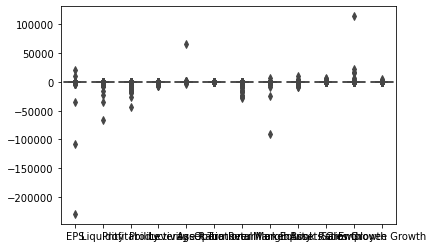

In [43]:
sns.boxplot(data=X_train_norm)

In [44]:
y_train_norm

0        0
1        0
2        0
3        0
4        0
        ..
55341    1
55342    1
55343    1
55344    1
55345    1
Name: BK, Length: 55346, dtype: int8

## Modelling Techniques


### Hyperparameter Tuning

In [75]:
param_grid = {'max_depth': [3, 5, 10,15],
              'min_samples_split': [2, 5, 10]}
base_estimator = RandomForestClassifier(random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, resource='n_estimators',
                         max_resources=30).fit(X_train_norm, y_train_norm)
sh.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=24,
                       random_state=0)

In [76]:
model = RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=24,random_state=0)
model.fit(X_train_norm,y_train_norm)
y_pred_RFC = model.predict(X_test_norm)
print('Random Forest Classifier')
print(classification_report(y_test_norm,y_pred_RFC))
metricsmodel(y_test_norm,y_pred_RFC)

Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     64577
           1       0.07      0.46      0.13       389

    accuracy                           0.96     64966
   macro avg       0.54      0.71      0.55     64966
weighted avg       0.99      0.96      0.98     64966

Precision = 0.07
Recall = 0.46
F1 Score Macro = 0.55
AUC = 0.71
-----------------------------------------------------------


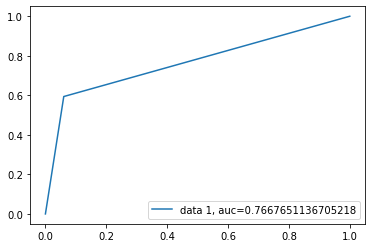

In [74]:
fpr, tpr, _ = metrics.roc_curve(y_test_norm,  y_pred_RFC)
auc = metrics.roc_auc_score(y_test_norm, y_pred_RFC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [48]:
model = GaussianNB()
model.fit(X_train_norm,y_train_norm)
y_pred_GNB = model.predict(X_test_norm)
print('GaussianNB')
print(classification_report(y_test_norm,y_pred_GNB))
metricsmodel(y_test_norm,y_pred_GNB)

GaussianNB
              precision    recall  f1-score   support

           0       1.00      0.06      0.11     64577
           1       0.01      0.95      0.01       389

    accuracy                           0.07     64966
   macro avg       0.50      0.51      0.06     64966
weighted avg       0.99      0.07      0.11     64966

Precision = 0.01
Recall = 0.95
F1 Score Macro = 0.06
AUC = 0.51
-----------------------------------------------------------


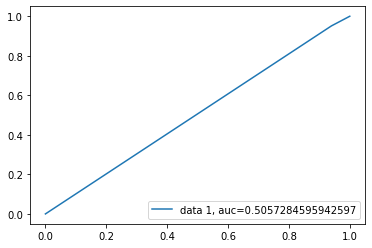

In [49]:
fpr, tpr, _ = metrics.roc_curve(y_test_norm,  y_pred_GNB)
auc = metrics.roc_auc_score(y_test_norm, y_pred_GNB)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [50]:
model = LinearSVC()
model.fit(X_train_norm,y_train_norm)
y_pred_SVC = model.predict(X_test_norm)
print('SVC')
print(classification_report(y_test_norm,y_pred_SVC))
metricsmodel(y_test_norm,y_pred_SVC)

SVC
              precision    recall  f1-score   support

           0       1.00      0.86      0.92     64577
           1       0.03      0.66      0.05       389

    accuracy                           0.86     64966
   macro avg       0.51      0.76      0.49     64966
weighted avg       0.99      0.86      0.92     64966

Precision = 0.03
Recall = 0.66
F1 Score Macro = 0.49
AUC = 0.76
-----------------------------------------------------------


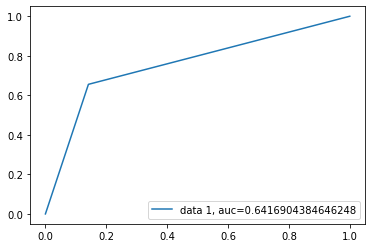

In [51]:
fpr, tpr, _ = metrics.roc_curve(y_test_norm,  y_pred_SVC)
auc = metrics.roc_auc_score(y_test_norm, y_pred_RFC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Metrics

## Test Data

#### Confusion Matrix:
- Positive/Negative: Type of Class (BK) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.

- True Negatives (Top-Left Square): This is the number of correctly classifications of the "No" (No Bankruptcy Detected) class

- False Negatives (Top-Right Square): This is the number of incorrectly classifications of the "No"(No Bankruptcy Detected) class.

- False Positives (Bottom-Left Square): This is the number of incorrectly classifications of the "Yes" (Bankruptcy Detected) class

- True Positives (Bottom-Right Square): This is the number of correctly classifications of the "Yes" (Bankruptcy Detected) class.

In [61]:
def cm_plot(y_test,y_pred,model):
    cm = confusion_matrix(y_test, y_pred,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

Random Forest Classification


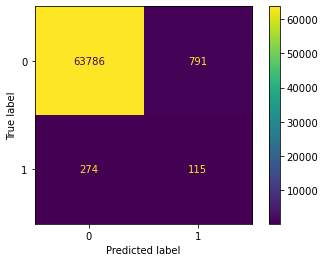

In [63]:
print('Random Forest Classification')
cm_plot(y_test_norm,y_pred_RFC,model)

Naive Bayes


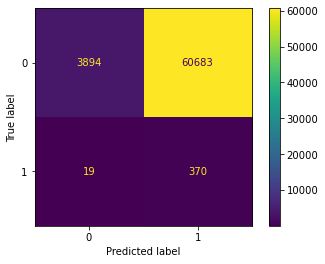

In [64]:
print('Naive Bayes')
cm_plot(y_test_norm,y_pred_GNB,model)

Linear SVC


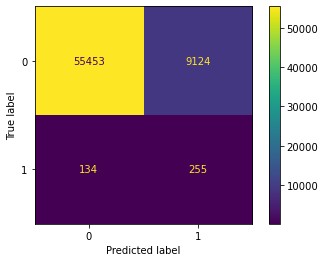

In [65]:
print('Linear SVC')
cm_plot(y_test_norm,y_pred_SVC,model)

### Conclusion

Note for Arnab | Varun: You will have to summarize everything that is done in this part to figure out how well did we do with our modelling.